<a href="https://colab.research.google.com/github/ZBHlily/Summer22-MicroCredential/blob/main/Readamission_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the problem 

We are trying to predict whether a patient is likely to be a readmit in the
hospital within 30 days

In [25]:
# sources used to assist with notebook:
# https://towardsdatascience.com/predicting-hospital-readmission-for-patients-with-diabetes-using-scikit-learn-a2e359b15f0
# https://www.kaggle.com/code/iabhishekofficial/prediction-on-hospital-readmission
# https://medium.com/@blogsupport/a-machine-learning-approach-to-predicting-hospital-readmissions-ecf2ea5e34c9
# https://www.kaggle.com/code/paultimothymooney/predict-diabetes-with-python-starter-kernel/notebook

# Task 2: Load the Libraries

In [1]:
# loading necessary libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Task 3: Load the data

In [20]:
# https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008
df = pd.read_csv('https://raw.githubusercontent.com/ZBHlily/Summer22-MicroCredential-Data/main/diabetic_data.csv')

# Task 4: EDA ( Exploratory Data Analysis )


In [3]:
df.head() 

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [12]:
# https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf 
# to see all the data 

pd.set_option('display.max_columns', None)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [50]:
df.head(20)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_group,fixed_age_group,weight_is_known
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,10,10,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,20,20,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,30,30,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,40,40,0
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,NaN,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,50,50,0
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,NaN,NaN,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,60,60,0
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,NaN,NaN,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30,70,70,0
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,NaN,NaN,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,80,80,0
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,NaN,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,90,90,0


In [10]:
df['medical_specialty'] # check to see this specific colmn

0         Pediatrics-Endocrinology
1                                ?
2                                ?
3                                ?
4                                ?
                    ...           
101761                           ?
101762                           ?
101763                           ?
101764             Surgery-General
101765                           ?
Name: medical_specialty, Length: 101766, dtype: object

In [5]:
df.describe() # output shows we need to scale since the values dont fall in similar ranges

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
df.isnull().sum() # checking for any null values 

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [8]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

there are some missing data with ? in weight, medical_specialty, diag_1, diag_2, race, payer_code, and diag_3

In [65]:
# replace ? with nan
df = df.replace('?',np.nan)

# replace the null values with unknown 
df['race'] = df['race'].fillna('Unknown')
df['payer_code'] = df['payer_code'].fillna('Unknown')
df['medical_specialty'] = df['medical_specialty'].fillna('Unknown')
df['diag_1'] = df['diag_1'].fillna('Unknown')
df['diag_2'] = df['diag_2'].fillna('Unknown')
df['diag_3'] = df['diag_3'].fillna('Unknown')

In [62]:
df[['weight']].head() # checking if it did replace

,weight
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [63]:
df.weight.isnull().sum() # those are null have no weight attached to it 

96218

In [64]:
df['weight_is_known'] = df.weight.notnull().astype('int') # added new column to see if there is a weight --> 1 if not 0

In [48]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_group,fixed_age_group,weight_is_known
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,10,10,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,20,20,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,30,30,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,40,40,0


In [43]:
# added new column for the age 
age_listings = {'[0-10)':0, '[10-20)':10, '[20-30)':20, '[30-40)':30, '[40-50)':40, '[50-60)':50, '[60-70)':60,  '[70-80)':70, '[80-90)':80, '[90-100)':90}
df['fixed_age_group'] = df.age.replace(age_listings)

In [44]:
df[['fixed_age_group']].head()

,fixed_age_group
0,0
1,10
2,20
3,30
4,40


In [40]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_group
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,10
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,20
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,30
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,40


In [15]:
df.groupby('readmitted').size() # checking size of readmitted 

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [52]:
df['readmitted_within_30_days'] = (df.readmitted == '<30').astype('int') # only want those within 30 days

From the id mapping csv file

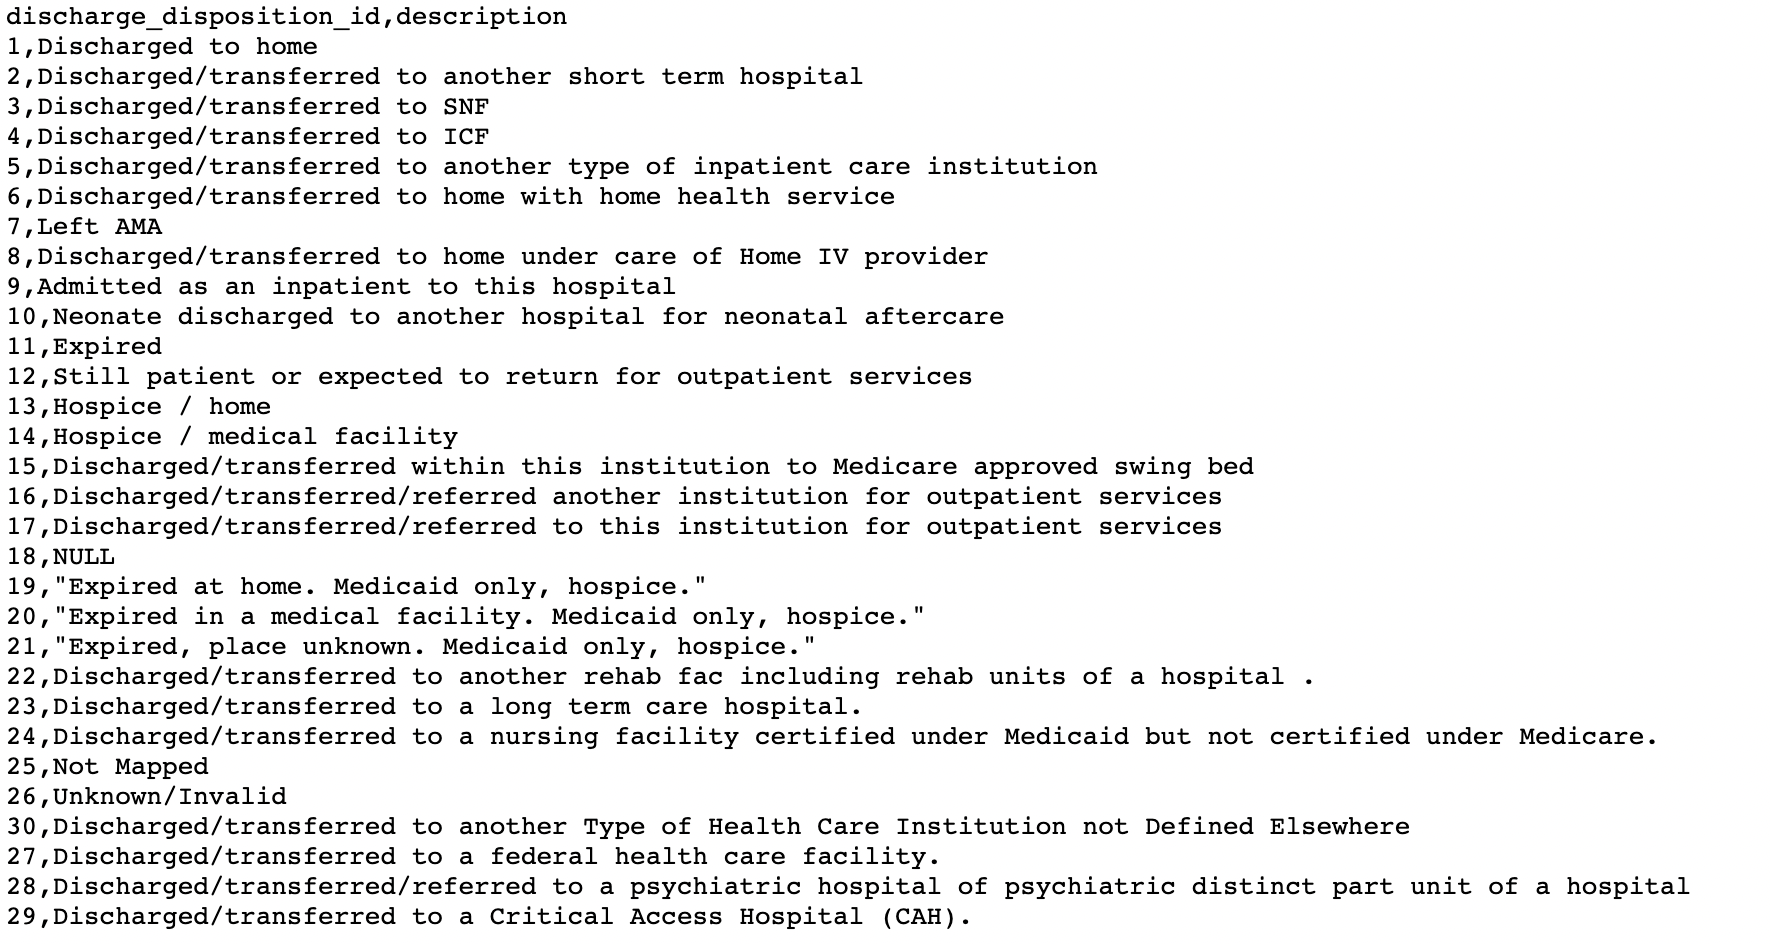

In [54]:
# need to drop those related to death since they cant be readmitted
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [58]:
df['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5,  7, 10,  4, 18,  8, 12, 16, 17, 22, 23,  9,
       15, 24, 28, 27])

In [66]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_group,fixed_age_group,weight_is_known,readmitted_within_30_days
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,Unknown,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,Unknown,Unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,Unknown,Unknown,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,10,10,0,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,Unknown,Unknown,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,20,20,0,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,Unknown,Unknown,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,30,30,0,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,Unknown,Unknown,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,40,40,0,0
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,Unknown,Unknown,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,50,50,0,0
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,Unknown,Unknown,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,60,60,0,0
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,Unknown,Unknown,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30,70,70,0,0
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,Unknown,Unknown,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,80,80,0,0
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,Unknown,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,90,90,0,0


In [ ]:
# print(df.iloc[0:, 51:54])

# Task 5: Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


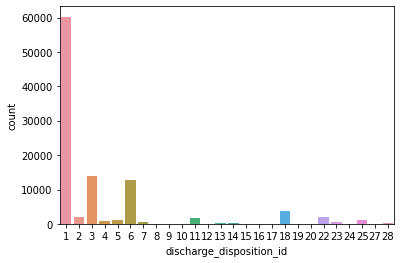

In [24]:
# seeing the distribution of discharge_disposition_id 
sns.countplot(df['discharge_disposition_id'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


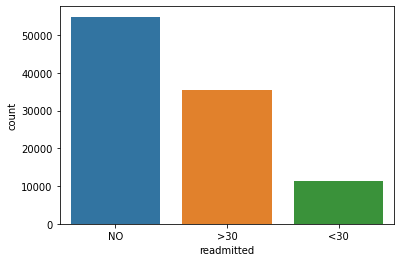

In [16]:
# seeing the distribution of readmitted 
sns.countplot(df['readmitted'])

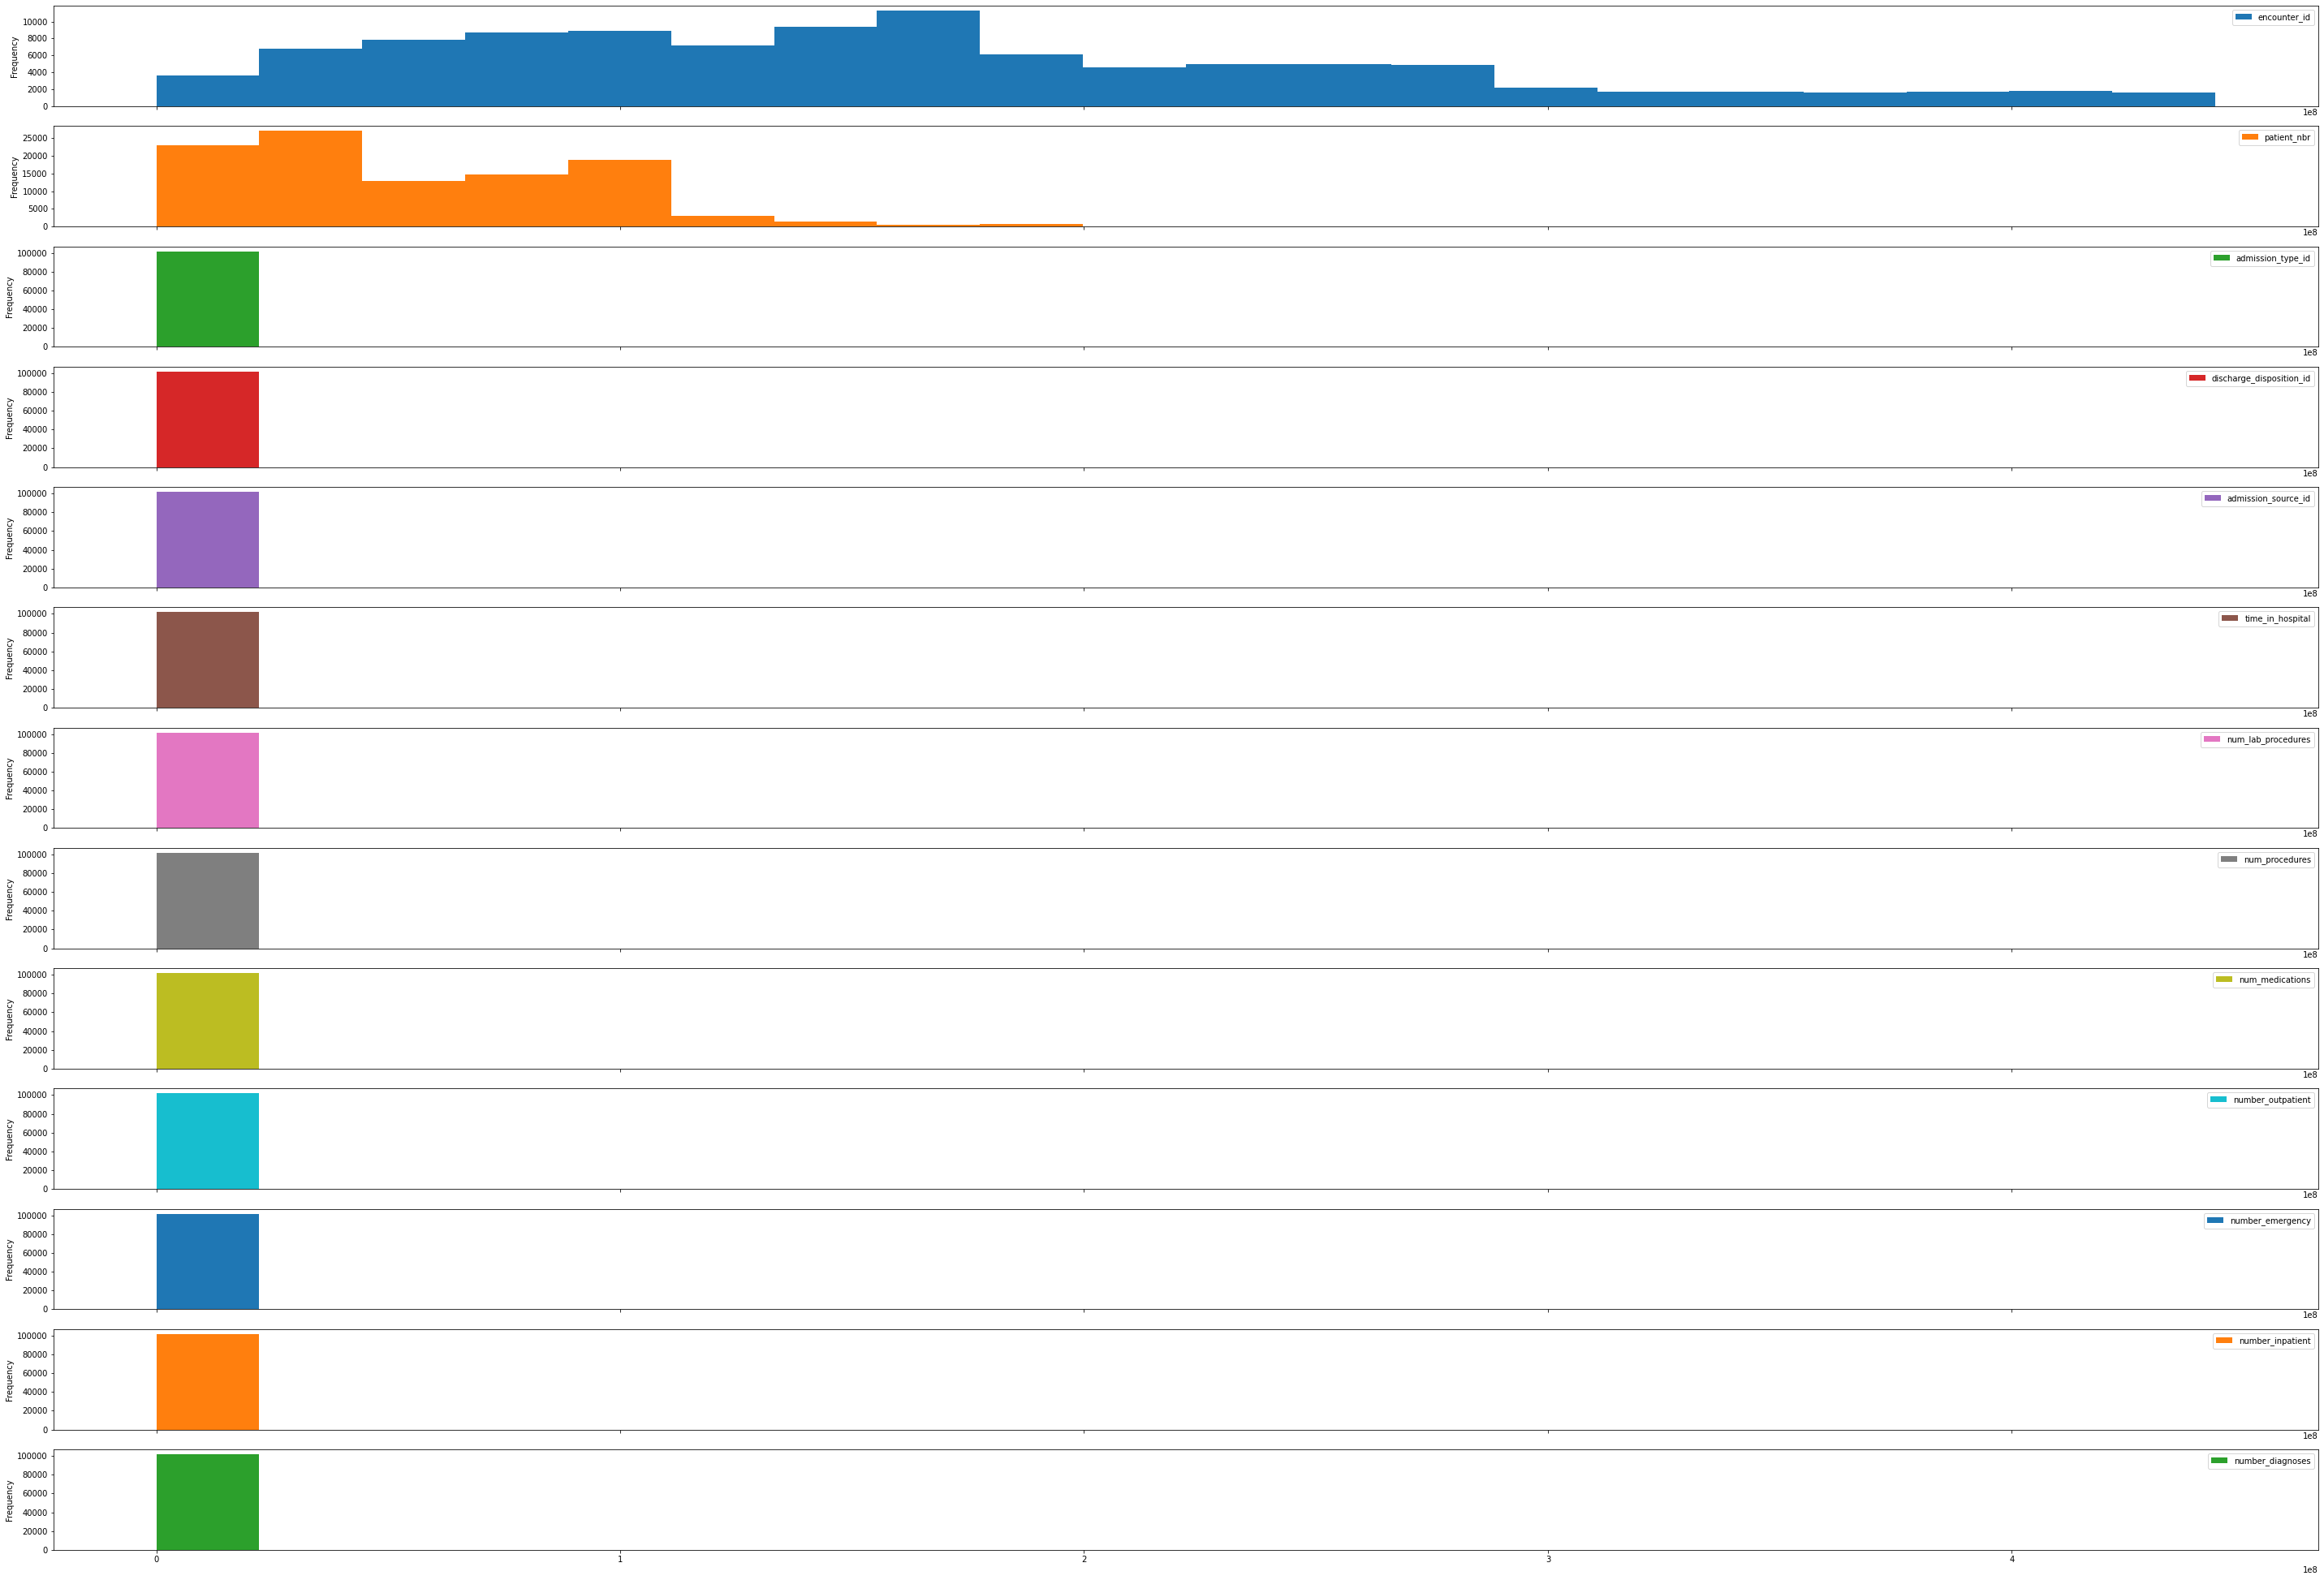

In [28]:
# plotting the all the columns 
df.plot(bins=20, kind='hist', subplots=True, figsize=(50,35)); # uses subplots to see frequence of each feature

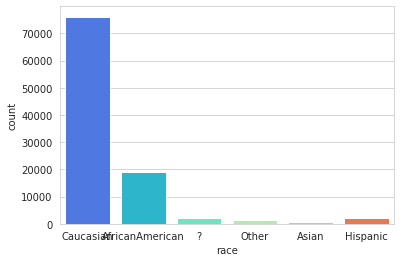

In [32]:
sns.set_style('whitegrid')
sns.countplot(x = "race", data = df, palette = "rainbow") # checking to see which race is more frequent 

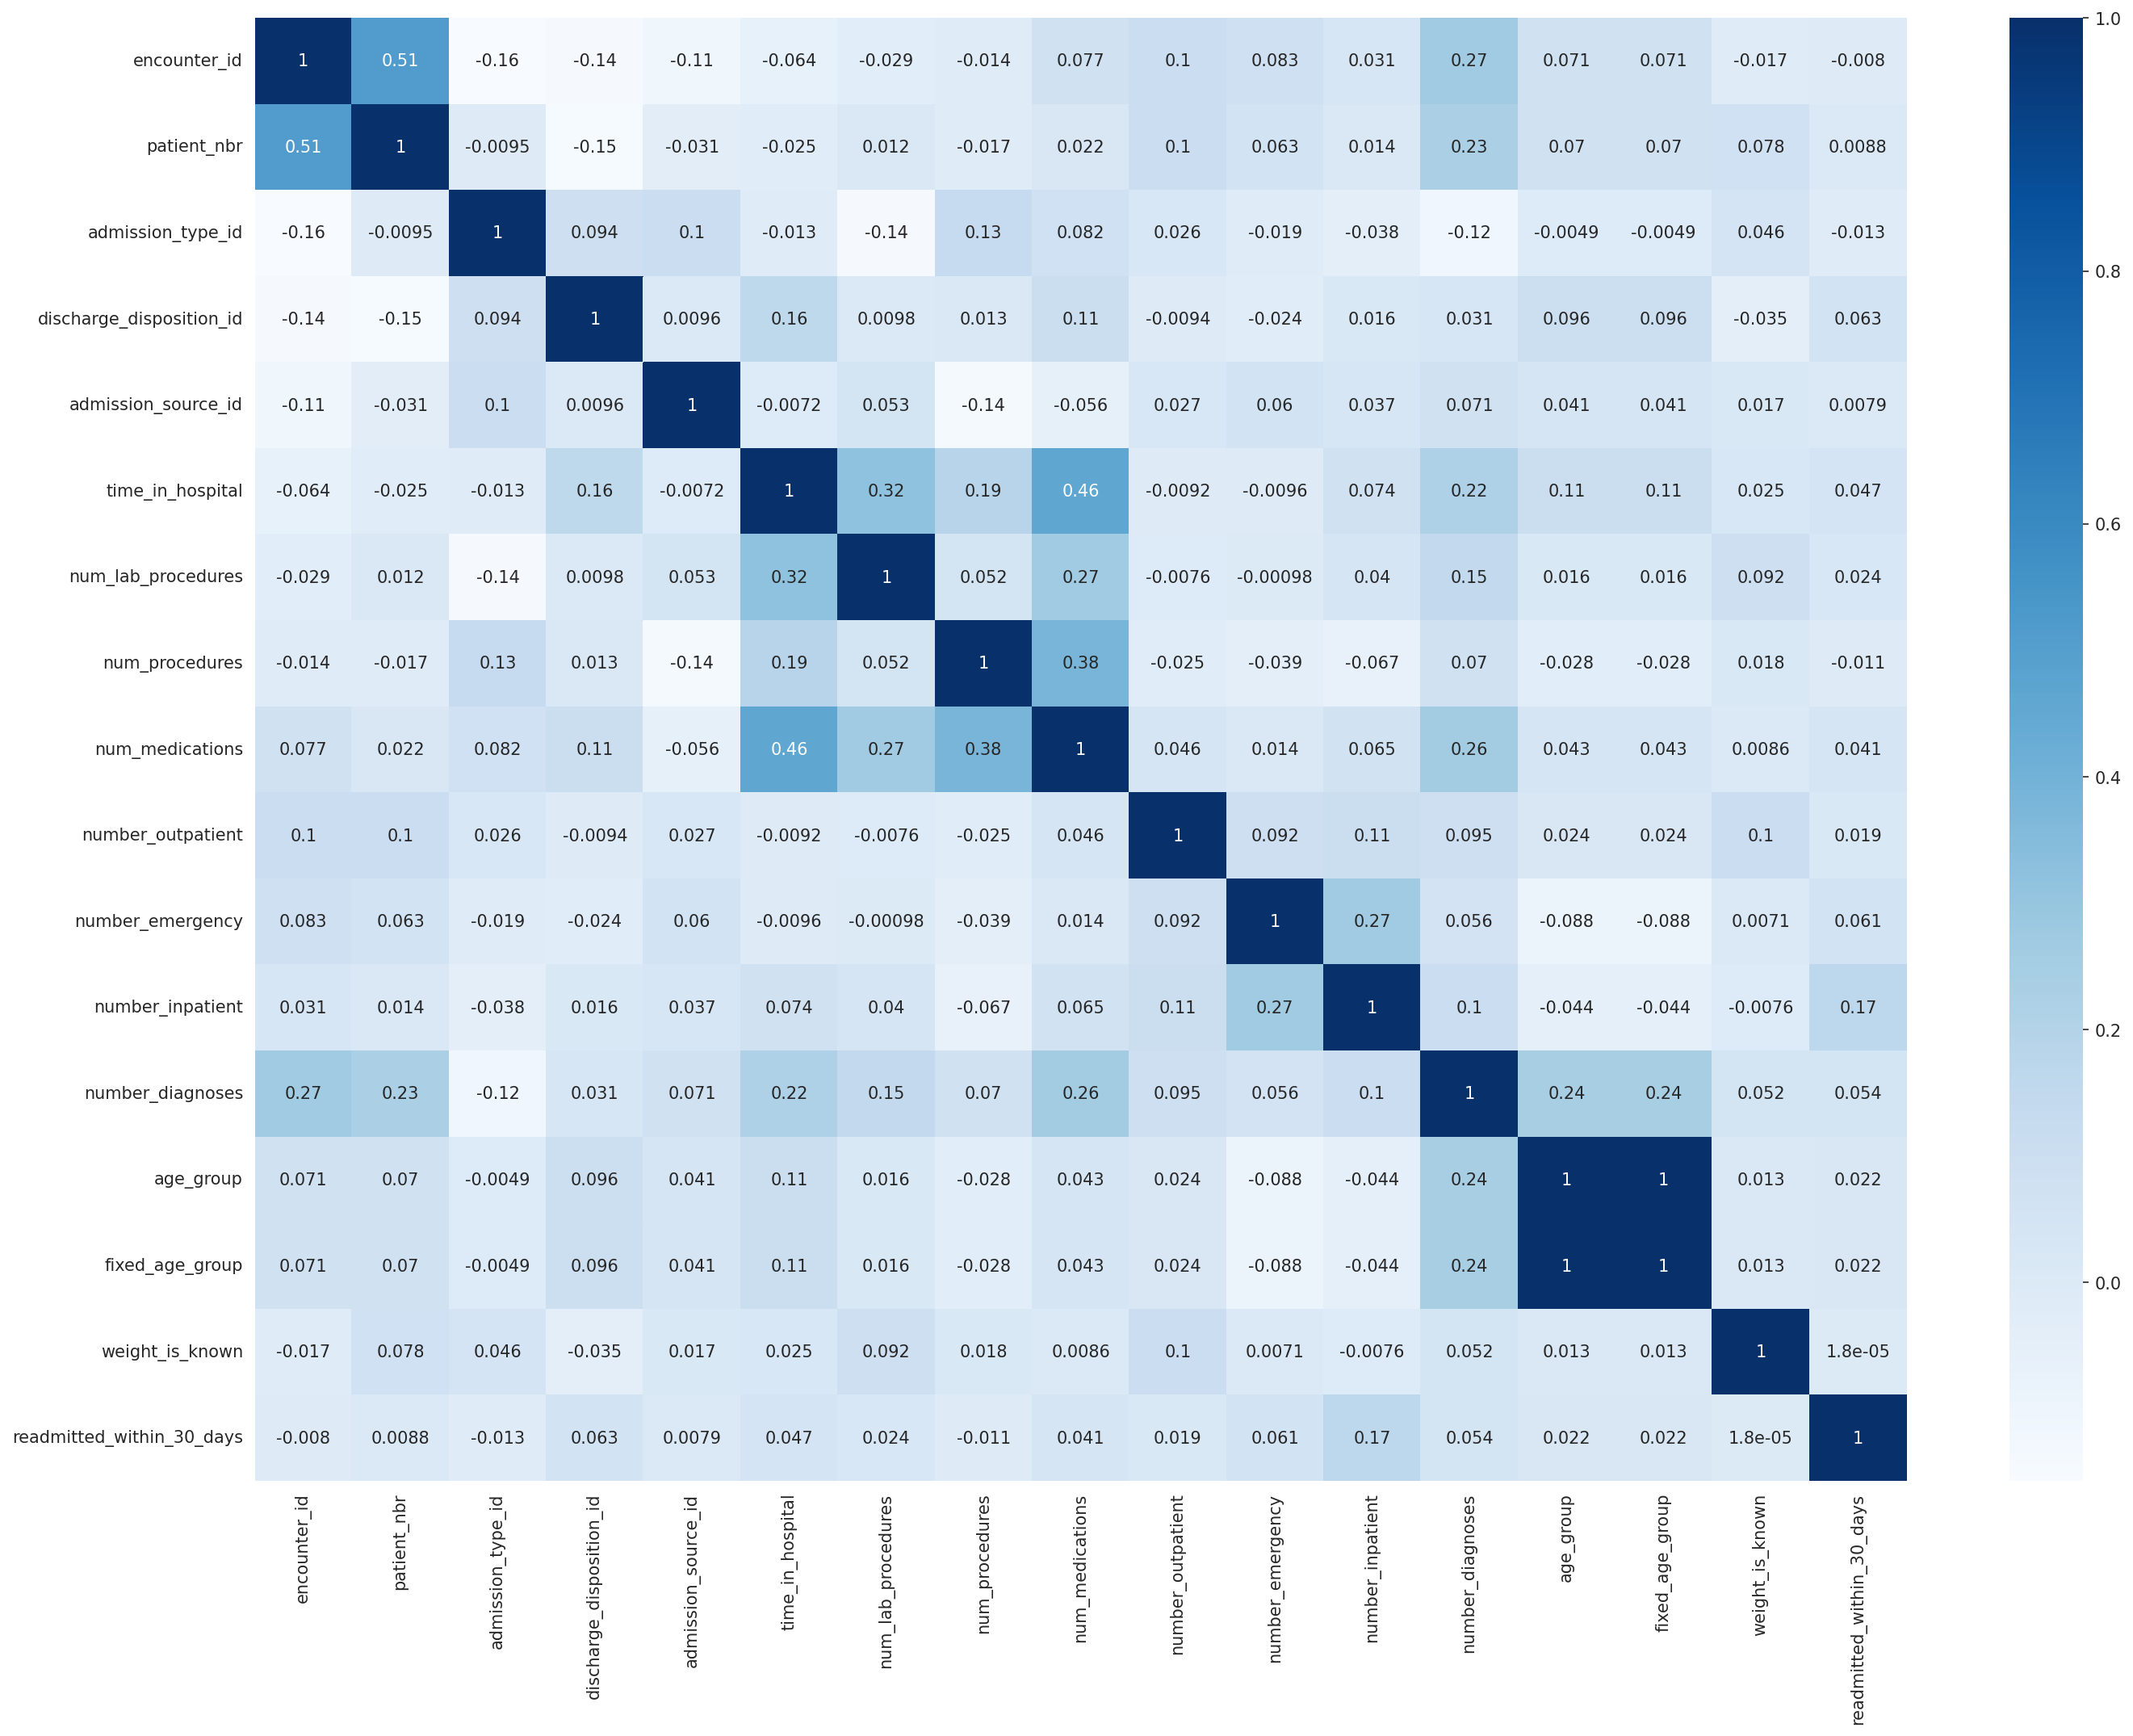

In [261]:
plt.figure(figsize=(22,16), dpi=150)
sns.heatmap(df.corr(), annot=True,cmap='Blues') # seeing the correlation for each colms

In [ ]:
# sns.pairplot(df, hue='time_in_hospital', palette='coolwarm') # catch all plots to see the where the correlations reside

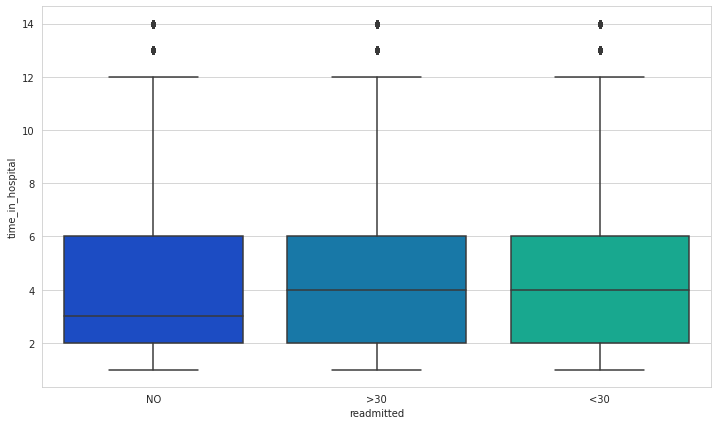

In [76]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'readmitted', y = 'time_in_hospital', data = df , palette = 'winter')  

# Task 6: Compute the cost Function

In [ ]:
#None needed 

# Task 7: Compute the Gradient Descent

In [ ]:
#None needed 

# Task 8: Visualizing the Cost Function

In [ ]:
#None needed 

# Task 9: Conduct KNN on the data

In [79]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_group,fixed_age_group,weight_is_known,readmitted_within_30_days
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,Unknown,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,Unknown,Unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,Unknown,Unknown,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,10,10,0,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,Unknown,Unknown,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,20,20,0,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,Unknown,Unknown,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,30,30,0,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,Unknown,Unknown,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,40,40,0,0


In [78]:
# importing necessary libraries for knn and random forest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [249]:

y = df['readmitted_within_30_days'] # label 
# X = df[['fixed_age_group', 'time_in_hospital']]
X = df[['fixed_age_group', 'time_in_hospital', 'discharge_disposition_id', 'weight_is_known']] # features

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30) # splitting the data 

In [251]:
from sklearn.preprocessing import StandardScaler # scaling it first for better accurancy
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [252]:
scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [253]:
error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
  

Text(0, 0.5, 'Error Rate')

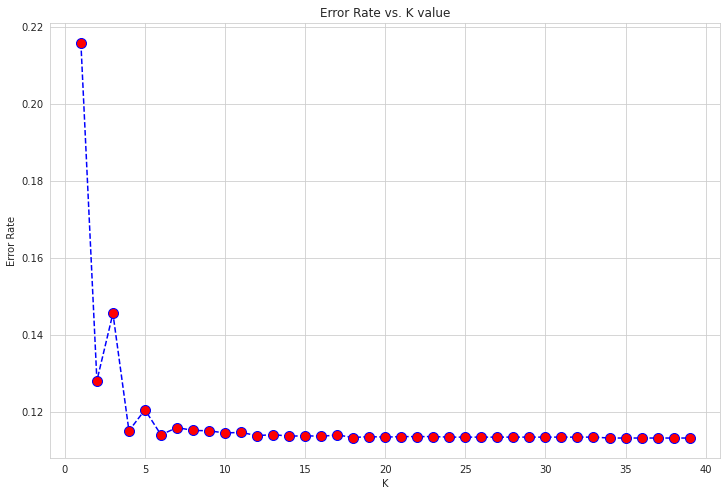

In [254]:
plt.figure(figsize = (12,8))
plt.plot(range(1,40), error_rate, color= 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [263]:
knn = KNeighborsClassifier(n_neighbors=2) # lowest error is when it drops when K is from 0 to 5
knn.fit(scaled_x_train, y_train)
pred = knn.predict(scaled_x_test) # Make predictions on the test data below and assign the result to the variable pred

In [264]:
print("K is 2")
print(confusion_matrix(y_test, pred))

K is 2
[[25957   402]
 [ 3402    42]]


In [265]:
print(classification_report(y_test, pred)) # accurancy is 0.87 which is okay 

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     26359
           1       0.09      0.01      0.02      3444

    accuracy                           0.87     29803
   macro avg       0.49      0.50      0.48     29803
weighted avg       0.79      0.87      0.83     29803



In [274]:
knn = KNeighborsClassifier(n_neighbors=35) # lowest error is when it drops when K is from 0 to 5
knn.fit(scaled_x_train, y_train)
pred = knn.predict(scaled_x_test) # Make predictions on the test data below and assign the result to the variable pred

In [275]:
print("K is 35")
print(confusion_matrix(y_test, pred))

K is 35
[[26425     0]
 [ 3378     0]]


In [276]:
print(classification_report(y_test, pred)) # accurancy is 0.87 which is okay 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26425
           1       0.00      0.00      0.00      3378

    accuracy                           0.89     29803
   macro avg       0.44      0.50      0.47     29803
weighted avg       0.79      0.89      0.83     29803



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Task 9a: Conduct random forest on the data

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30) # splitting data 

In [273]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) # Create the random forest model but with parameters of n_estimators=100 
rfc.fit(X_train, y_train) # fitting the model to training data 
rfc_pred = rfc.predict(X_test) #Make predictions on the test data below 
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26425
           1       0.24      0.01      0.02      3378

    accuracy                           0.88     29803
   macro avg       0.56      0.50      0.48     29803
weighted avg       0.81      0.88      0.83     29803



# Task 10: Making Predictions

Both models perform well with at least 80 percent accuracy but there needs to be a further analysis done with other models to see which one best fits this analysis. For KNN, when the k is 35, there is a higher accuracy and random forest does pretty well. I think if there were more features there would be a better model for this analysis. 